In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [10]:
df.sort_values(by='Date')
print(df)

                                                 Route ID    Bike  \
0       route_05_2021@85102858-c13c-4d82-8bd8-60570700...  3454.0   
1       route_05_2021@85102858-c13c-4d82-8bd8-60570700...  3454.0   
2       route_05_2021@85102858-c13c-4d82-8bd8-60570700...  3454.0   
3       route_05_2021@85102858-c13c-4d82-8bd8-60570700...  3454.0   
4       route_05_2021@85102858-c13c-4d82-8bd8-60570700...  3454.0   
...                                                   ...     ...   
116251  route_09_2021@6e69b446-0d7b-49ff-9ad6-d386a7b5...   952.0   
116252  route_09_2021@6e69b446-0d7b-49ff-9ad6-d386a7b5...   952.0   
116253  route_09_2021@6e69b446-0d7b-49ff-9ad6-d386a7b5...   952.0   
116254  route_09_2021@6e69b446-0d7b-49ff-9ad6-d386a7b5...   952.0   
116255  route_09_2021@6e69b446-0d7b-49ff-9ad6-d386a7b5...   952.0   

                            Date   Latitude  Longitude Routes & locations  \
0      2021-05-29 10:10:34+00:00  42.204525 -72.602950                NaN   
1      2021-05-29

In [11]:
routesDict = {}
for index, row in df.iterrows():
    ID = row['Route ID']
    time = row['Date']
    location = (row['Latitude'], row['Longitude'])
    if ID not in routesDict.keys():
        routesDict[ID] = {"locations": [location], "startTime": time, "endTime": time}
    else:
        routesDict[ID]["locations"].append(location)
        routesDict[ID]["endTime"] = time


In [12]:
print(list(routesDict.keys())[11])

route_05_2021@2024df13-5283-4c26-a09a-b427774360e0


-72.56012833333334 42.35380166666667 -72.533285 42.36834
route_05_2021@2024df13-5283-4c26-a09a-b427774360e0: start time: 2021-05-29 15:33:09+00:00, end time: 2021-05-29 16:56:39+00:00


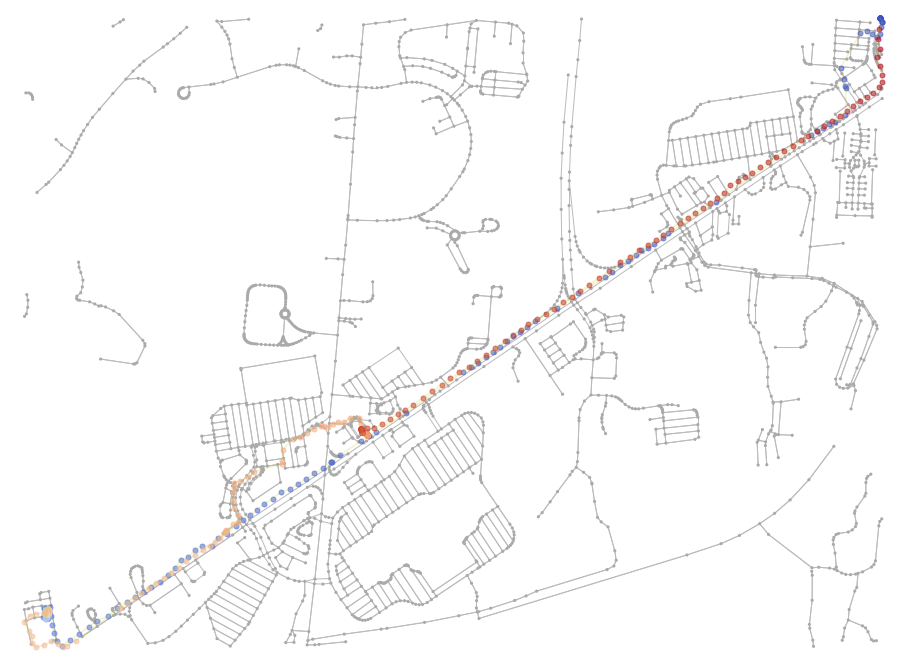

In [50]:
import pandas as pd
import numpy as np
import sys
import math
import osmnx as ox
import networkx as nx
import pickle
from time import time
import time
from xml.dom import NotFoundErr
import itertools
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import osmnx.geometries as gx
import numpy as np
import math

route = routesDict["route_05_2021@2024df13-5283-4c26-a09a-b427774360e0"]
locationList = route["locations"]
startTime = route["startTime"]
endTime = route["endTime"]

pointsList = []
for lat, long in locationList:
    pointsList.append(Point(long, lat))

# convert to GeoDataFrame (enables next step)
points = gpd.GeoSeries(pointsList, crs='epsg:4326')
gpd = gpd.GeoDataFrame({'geometry': pointsList})

minx, miny, maxx, maxy = gpd.geometry.total_bounds
print(minx, miny, maxx, maxy)
print("route_05_2021@2024df13-5283-4c26-a09a-b427774360e0: start time: {}, end time: {}".format(startTime, endTime))
if (minx == maxx) and (miny == maxy):
    print("invalid route!")
else:
    G = ox.graph_from_bbox(miny, maxy, minx, maxx, simplify=False, retain_all=True)

    # project to CRS (coordinate reference system) used by the projected graph (this is for accuracy)
    pointsProg = points.to_crs(G.graph['crs'])

fig, ax = ox.plot_graph(
    G, bgcolor="w", node_color="#AAAAAA", figsize=(20, 12), node_size=10, edge_linewidth=1, edge_color="#BBBBBB", show=False, save=False, close=False
)

cmap = plt.cm.get_cmap('coolwarm',len(pointsProg))
colors = list(cmap(np.arange(len(pointsProg))))
colors[0] = "#000000"
pointsX = []
pointsY = []
for i, point in enumerate(pointsProg):
    pointsX.append(point.x)
    pointsY.append(point.y)
    ax.scatter(point.x, point.y, color=colors[i], s = 25, alpha = 0.6)
ax.plot(pointsX, pointsY, c="y", alpha = 0.2)

extent = ax.bbox.transformed(fig.dpi_scale_trans.inverted())
plt.draw()
plt.show()

In [ ]:
import functions as f

stations = pd.read_csv("stations.csv")
lats = list(stations.get('latitude'))
longs = list(stations.get('longitude'))

names = []
towns = []
points = []
for index, row in stations.iterrows():
    names.append( row['name'] )
    towns.append( row["town"] )
    lat = lats[index]
    long = longs[index]
    points.append( (lat, long) )